### Маркетингова кампания на банка (Bank Marketing Campaign)

Целта на текущия notebook е:
- да разгледаме данните от Bank Marketing Campaign dataset-a;
- да използваме няколко алгоритъма, за да направим модел, който предсказва, дали клиент е подписал договор за срочен депозит (term deposit).

(Малко пояснение) Срочен депозит - депозит, който банка или финансов институт предлага с фиксиран лихвен процент, при който парите се връщат обратно на клиента на определена дата.

Нека като за начало заредим данните от датасета:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('bank.csv')

Нека сега изведем първите няколко реда и малко базова информация, за да придобием първоначална представа за датасета:

In [2]:
print(data.head())
print("\n\n")

print(data.info())
print("\n\n")

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 

В датасета имаме налични 17 колони и 11162 реда. 
Нека представим кратко описание на всеки feature на данните:

### Данни за клиенти на банката:

 - **age**:  възраст (numeric)

 - **job**: вид работа (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services',
  'student','technician','unemployed','unknown')
 
 - **marital**: семейно положение (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
 
 - **education**: образование (categorical: primary, secondary, tertiary and unknown)
 
 - **default**: има ли неплатен кредит (categorical: 'no','yes','unknown')
 
 - **balance**: наличен баланс по сметката
 
 - **housing**: има ли жилищен кредит (categorical: 'no','yes','unknown')
 
 - **loan**: има ли личен заем (categorical: 'no','yes','unknown')

### Данни, свързани с последния контакт за текущата кампания:

 - **contact**: тип комуникация на контакта (categorical: 'cellular','telephone')

 - **day**: ден от седмицата, в който е осъществен последният контакт (numerical: day of the month)

 - **month**: последният месец от годината, в който е осъществен контактът (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

 - **duration**: продължителност на последния контакт в секунди (numeric).

### Други данни: 

 - **campaign**: брой контакти, осъществени по време на тази кампания и за този клиент (numeric, включва последния контакт)
 
 - **pdays**: брой дни, изминали след последния контакт с клиента от предишна кампания (numeric; 999 означава, че с клиента не е осъществяван контакт преди това)
 
 - **previous**: брой контакти, осъществени преди тази кампания и за този клиент (numeric)
 
 - **poutcome**: резултат от предишната маркетингова кампания (categorical: 'failure','nonexistent','success')

 - **deposit**: дали клиентът е подписал договор за срочен депозит (binary: 'yes','no')

Нека видим и общите статистики за колоните на датасета:

In [5]:
print(data.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


Сега да разгледаме хистограмите на numerical feature-ите на датасета: 

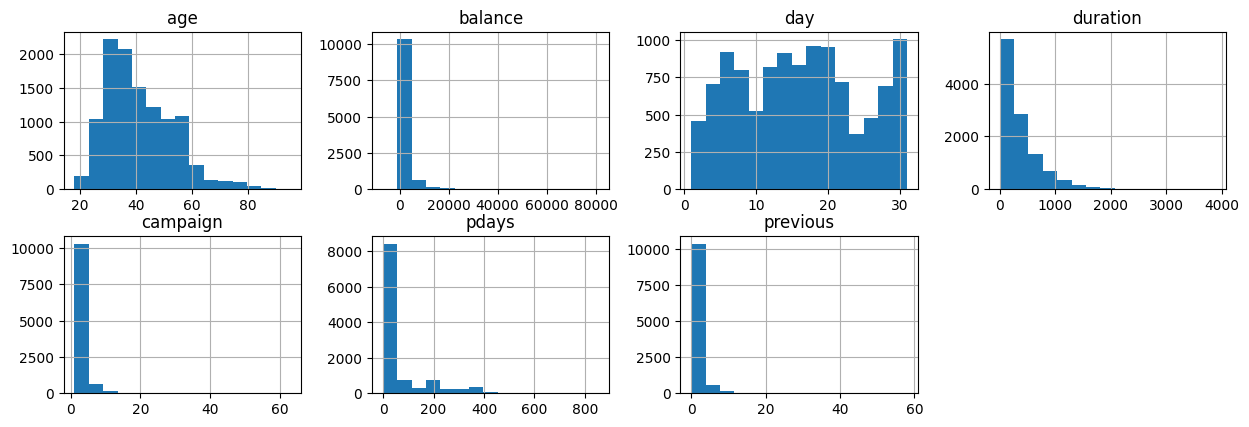

In [3]:
data.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.show()

Да представим и categorical feature-ите по подходящ начин - чрез стълбовидни диаграми:

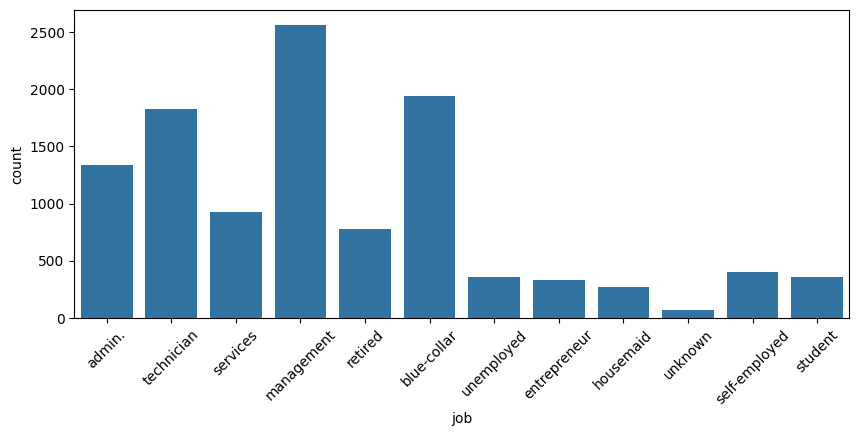

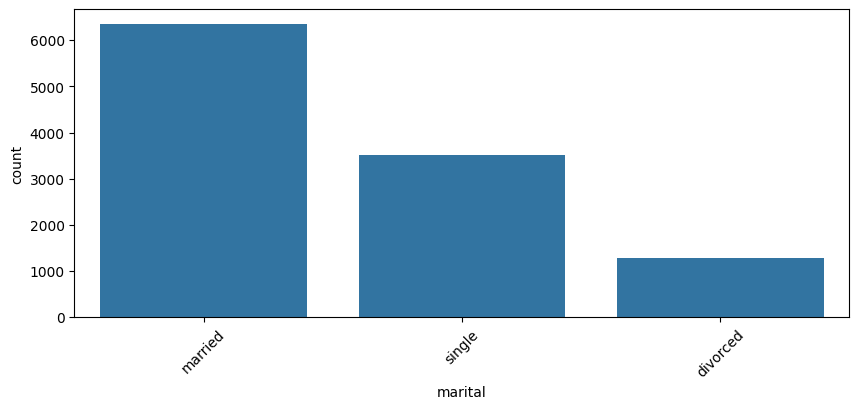

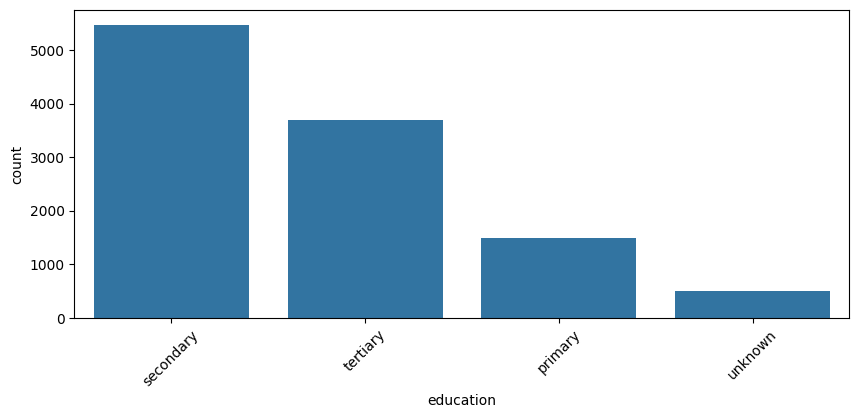

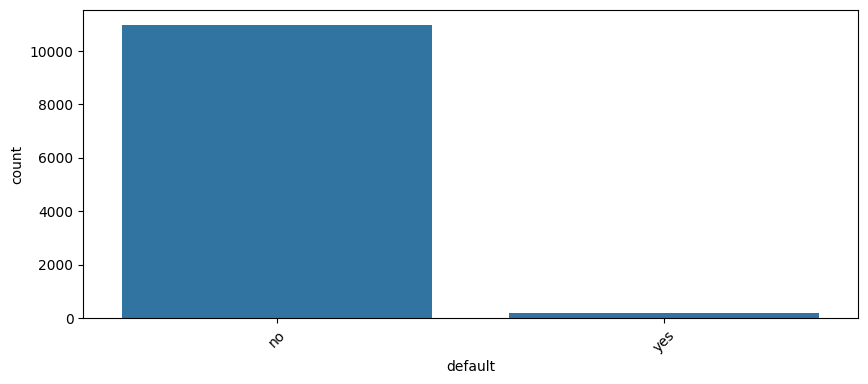

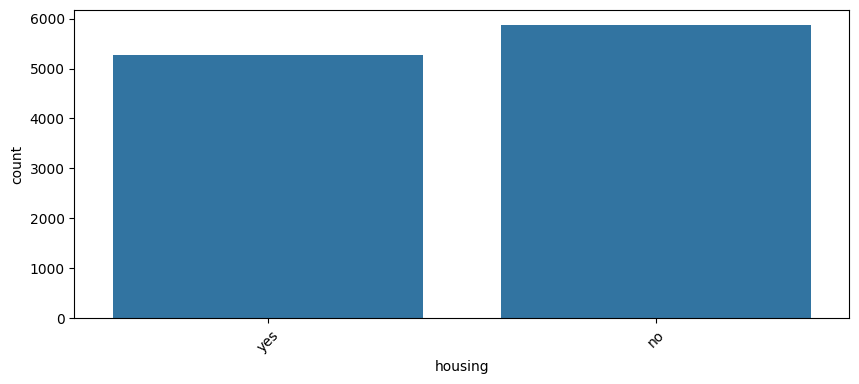

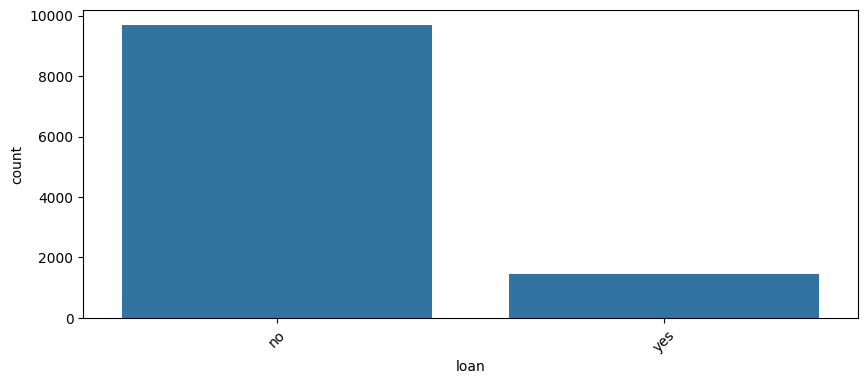

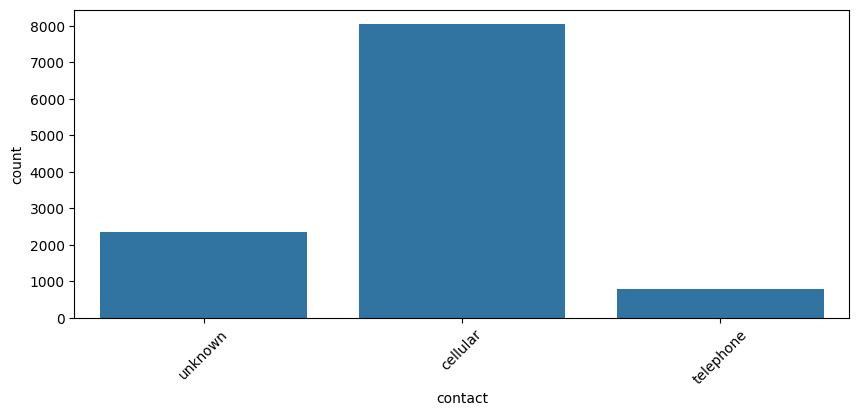

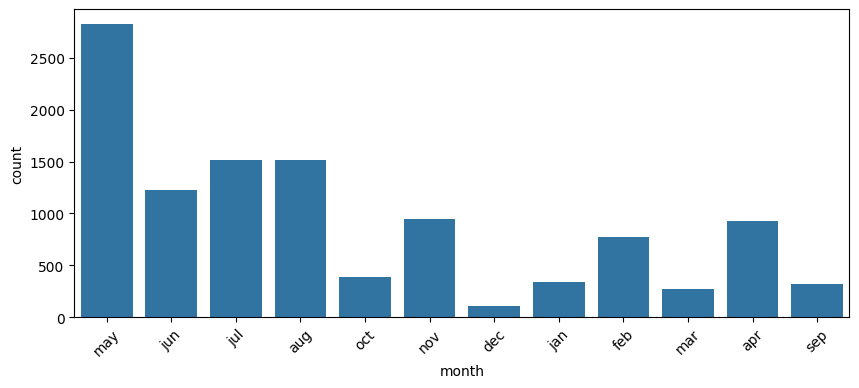

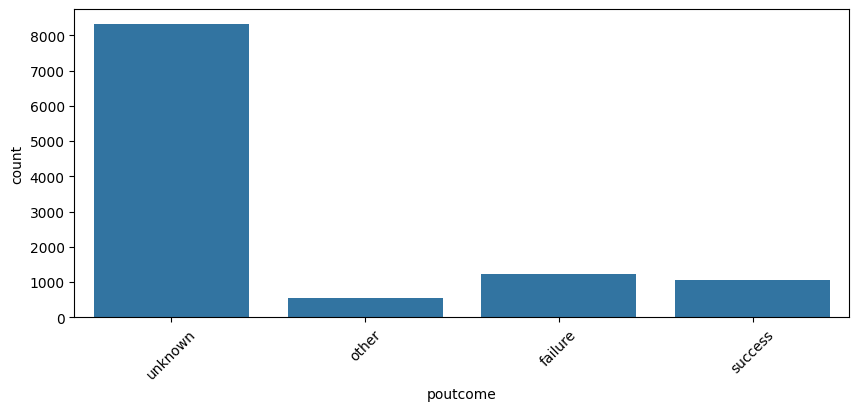

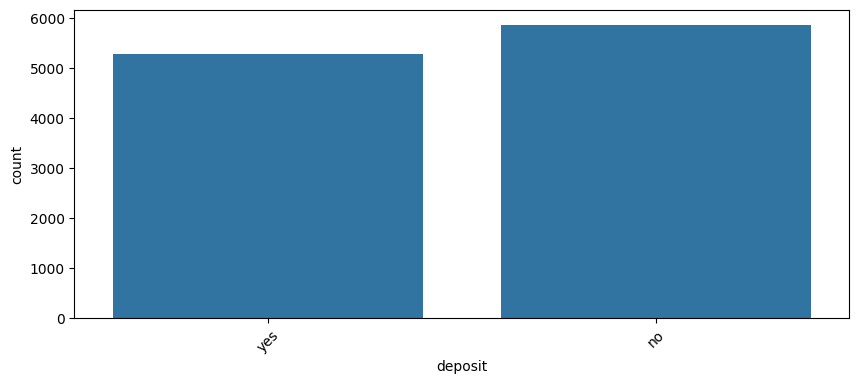

In [4]:
categorical_features = data.select_dtypes(include=['object']).columns
for column in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=column, data=data)
    plt.xticks(rotation=45)
    plt.show()

След като разгледахме данните в датасета Bank Marketing Campaign нека направим проверка за липсващи стойности:

In [7]:
print("\nCount of Missing Values:")
print(data.isnull().sum())


Count of Missing Values:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


Както виждаме, няма липсващи стойности в датасета, което е в наш плюс.

Както пояснихме още в началото, за да предскажем дали клиент е подписал договор за срочен депозит, ще използваме няколко алгоритъма.
В случая алгоритмите, които избрахме да използваме, са следните:

- **Логистичната регресия** е проста и резултатите от нея се интерпретират лесно. Тя моделира вероятността за двоичен резултат въз основа на линейна комбинация от характеристики. Не може обаче да улови сложни взаимоотношения в данните, тъй като предполага линейност. Когато броят на характеристиките е много голям, логистичната регресия може да не е най-добрият избор. Това се наблюдава и в нашия случай.

- **Random Forest** да моделира сложни взаимоотношения благодарение на ансамбловия си характер, обединяващ множество decision trees. Той е по-малко склонен към overfitting, тъй като усреднява множество дървета. Също така дава представа за важността на характеристиките, което може да бъде ценно за разбирането на данните.
Обучението на множество дървета може да бъде изчислително скъпо, особено при много големи набори от данни.

- **SVM** се представя добре в пространства с висока размерност (много характеристики), което го прави подходящ за набори от данни, в които характеристиките са повече от извадките.
Използването на различни функции на ядрата прави SVM много гъвкав, способен да моделира сложни, нелинейни взаимоотношения. Ние използваме стойността по подразбиране ("rbf").
Ефективността на SVM зависи в голяма степен от избора на ядрото и настройката на неговите параметри, което може да бъде сложна задача (и е нещо, с което може допълнително да се доекспериментира, за да видим дали може да надмине Random Forest по резултати).

Да започнем с преобразуване на категорийните данни в числови, след което да нормализираме всички числови данни:

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoders = {}
for column in categorical_features:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])


scaler = StandardScaler()
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_features] = scaler.fit_transform(data[numerical_features])

Сега да дефинираме своята TARGET променлива - в нашия случай deposit:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

target = 'deposit' 

Разделяме датасета на тестов и трениращ сет като за тестовия сет заделяме 30% от данните:

In [7]:
X = data.drop(target, axis=1)
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Нека пробваме и друг подход, чрез K-Fold Cross Validation

In [14]:
from sklearn.model_selection import KFold, cross_val_predict

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

И сега да натренираме моделите чрез трите алгоритъма, които избрахме:

In [17]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

predictions = {}
for name, model in models.items():
    predictions[name] = cross_val_predict(model, X, y, cv=kfold)

    model.fit(X_train, y_train)

    print(f"{name} model trained.")


c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression model trained.
Random Forest model trained.
Support Vector Machine model trained.


### Пояснение за избора на метрики:


Избраните показатели - accuracy, precision, recall и F1 Score (резултат F1), confusion matrix - са избрани, тъй като осигуряват цялостна оценка на ефективността на моделите за класификация.

- **Точността** е най-простата метрика и показва общия процент на правилно класифицираните случаи. Полезна за обща оценка на ефективността на модела.

- **Прецизността** измерва съотношението на правилно предсказаните положителни (true positives) наблюдения към общия брой предсказани положителни наблюдения. Тя е важна за оценка на това колко надеждни са положителните прогнози на модела. (в случая прецизността ни дава оценка за колко е надеждно моделът да прогнозира правилно, че клиентът ще се абонира за срочен депозит. Ще ни спестява време и ресурси в преследване на клиенти, които не са склонни да се абонират за депозита.)

- **Recall** показва колко от действителните положителни случаи моделът е идентифицирал правилно. Той е от решаващо значение в ситуации, в които пропускането на положителни случаи е критично. (в случая изпускането на клиент, който ще абонира за срочен депозит). По-склонни сме да мислим, че recall е по-важна метрика в нашия случай, тъй като изпускането на клиент, който иначе би сключил договор ни губи потенциално повече пари отколкото да говоренето с клиенти, които в крайна сметка не включват договор. И второто пак е загуба на ресурси, но сякаш с не толкова голяма тежест.

- **F1 score** съчетава **precision** и **recall** в една метрика, която балансира между тях, особено полезна в случаи на небалансирани класове.
Използването на тези показатели заедно дава по-задълбочена представа за силните и слабите страни на всеки модел. (в нашия случай не може да се каже, че имаме особено небалансирани класове - target variable-a ни има 5289 "yes" и 5873 "no") 

- **Матрица на грешките** - ще я използваме, за да можем по-нагледно да видим колко често моделите predict-ват TN, FN, TP и FP

In [13]:
print(data.value_counts('deposit'))

deposit
0    5873
1    5289
Name: count, dtype: int64


Нека изведем метриките за всеки модел - избрали сме да разгледаме точността, прецизността, възвръещамостта, F1 score-a и матрицата на грешки на моделите:

Метрики за Logistic Regression:
Точност: 0.7882950134368468
Прецизност: 0.7977453580901857
Възвръщаемост: 0.7485998755444928
F1 Score: 0.7723916532905298

Confusion Matrix:


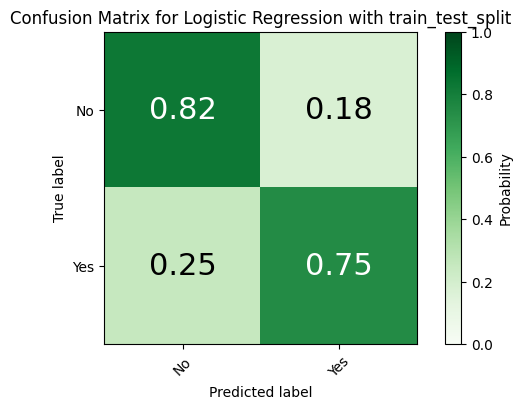



-------------------------------------------
Метрики за Logistic Regression:
Точност: 0.7949292241533775
Прецизност: 0.7948113207547169
Възвръщаемост: 0.7646057855927396
F1 Score: 0.7794160161896502

Confusion Matrix:


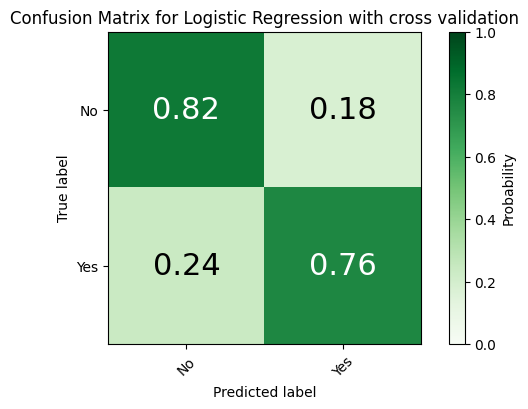



Метрики за Random Forest:
Точност: 0.8426395939086294
Прецизност: 0.8121387283236994
Възвръщаемост: 0.8742999377722465
F1 Score: 0.8420737189091999

Confusion Matrix:


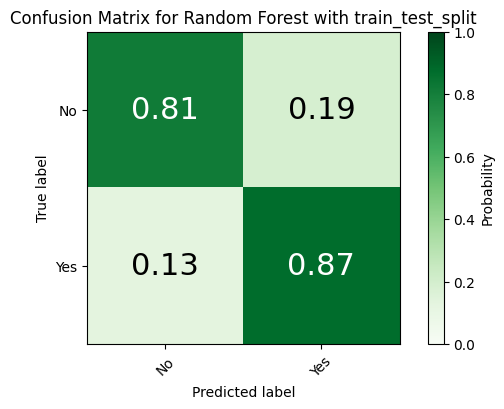



-------------------------------------------
Метрики за Random Forest:
Точност: 0.8476079555635191
Прецизност: 0.8184238551650692
Възвръщаемост: 0.8718094157685763
F1 Score: 0.8442735512221917

Confusion Matrix:


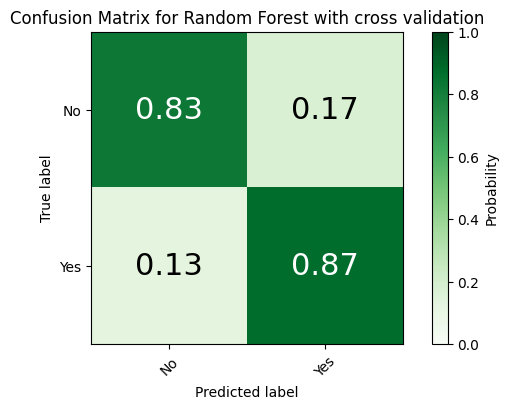



Метрики за Support Vector Machine:
Точност: 0.8112869513287548
Прецизност: 0.8052598622417032
Възвръщаемост: 0.8002489110143124
F1 Score: 0.8027465667915106

Confusion Matrix:


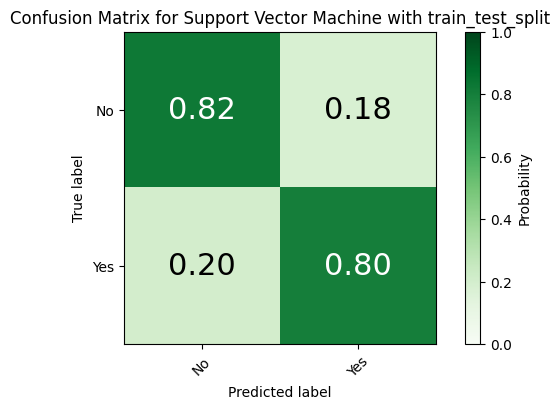



-------------------------------------------
Метрики за Support Vector Machine:
Точност: 0.8179537717254972
Прецизност: 0.8060514940800602
Възвръщаемост: 0.8109283418415579
F1 Score: 0.8084825636192272

Confusion Matrix:


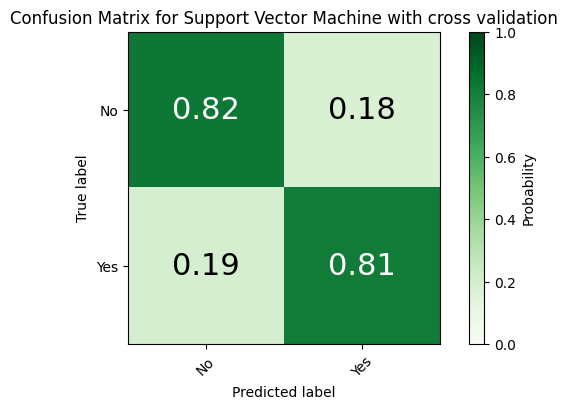

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import itertools
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens,
                          figsize=(6, 4)):
    matrix = confusion_matrix(y_true, y_pred)
    matrix_norm = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=figsize)
    plt.imshow(matrix_norm, interpolation='nearest', cmap=cmap, vmin=0.0, vmax=1.0)
    plt.title(title)
    cbar = plt.colorbar()
    cbar.set_label('Probability')

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = matrix_norm.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        color = "white" if matrix_norm[i, j] > thresh else "black"
        plt.text(j, i, format(matrix_norm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="center",
                 size=int((figsize[0] / 10) * 38),
                 color=color)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


def display_metrics(name, y_test, y_pred, class_names, validation_method='train_test_split'):
    print(f"Метрики за {name}:")
    print(f"Точност: {accuracy_score(y_test, y_pred)}")
    print(f"Прецизност: {precision_score(y_test, y_pred)}")
    print(f"Възвръщаемост: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}"+'\n')

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion Matrix for ' + name + ' with '+validation_method)
    plt.show()
    print("\n")

class_names = ['No', 'Yes']
for name, model in models.items():
    y_pred = model.predict(X_test)
    display_metrics(name, y_test, y_pred, class_names)

    print("-------------------------------------------")
    display_metrics(name, y, predictions[name], class_names, 'cross validation')
    

## Анализ на резултатите от избраните алгоритми

- Random Forest се представя най-добре по всички показатели, което показва, че той е най-балансираният модел за този конкретен набор от данни и проблем. Той е особено силен по отношение на recall и също така показва добра прецизност и точност.

- Support Vector Machine е на близко второ място, с балансирани показатели, но с малко по-ниски стойности във всяка категория в сравнение с Random Forest.

- Логистичната регресия е най-слабият модел в това сравнение, с най-ниски резултати по всички показатели. Въпреки това резултатите му не са драстично по-ниски, което предполага, че той все още може да бъде добър модел в зависимост от специфичните изисквания и ограничения на проблема.

При условие че имаме medium-sized dataset (11162 реда, 17 колони), липсата на някаква значителна разлика в метриките при използване на различни валидационни мероди е очаквана. Означава, че моделите ни са стабилни и надеждни и има висока вероятност да се справят добре при нови данни (няма да overfit-нат).

Сега ще опитаме да повторим горното упражнение (използвайки само train_test_split), но в два конкретни случая:
- изключвайки характеристиката default от датасета
- изключвайки характеристиката duration от датасета

Но защо?

Искаме да проверим как моделите ще предвиждат в случай, в който сме премахнали характеристика, която има слаба корелация към TARGET променливата, и съответно такава, която има силна корелация към нея.

Нека първо обаче да видим кои харектеристики имат слабо влияние върху целевата ни променлива използвайки RandomForestClassifier:

In [11]:
feature_importances = models['Random Forest'].feature_importances_
feature_names = X_train.columns
feature_data = pd.DataFrame({'feature_names': feature_names, 'feature_importances': feature_importances})
feature_data.sort_values('feature_importances', inplace=False)

,feature_names,feature_importances
4,default,0.001248
7,loan,0.010931
2,marital,0.018696
3,education,0.023803
14,previous,0.025214
6,housing,0.031727
15,poutcome,0.034025
12,campaign,0.034656
8,contact,0.038762
1,job,0.038932


Нека поясним:

Причината, поради която продължителността (duration) е силно свързана с откриването на срочен депозит, е, че колкото повече банката разговаря с целевия клиент, толкова по-голяма е вероятността той да открие срочен депозит, тъй като по-високата продължителност означава по-висок интерес (ангажимент) от страна на потенциалния клиент.
За целите на нашата задача ще тестваме моделите изключвайки продължителността, за да бъде предвиждането на моделите ни максимално обективно, тъй като от реалистична гледна точка тя не е известна преди осъществяването на обаждането, следователно.


Що се отнася до default характеристиката, очевидно е, че дали клиентът има или няма неплатен кредит няма кой знае какво значение за това дали би се абонирал за срочен депозит.

1. Изключвайки характеристиката default

Нека първо премахнем default feature-а от датасета:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data_reduced = data.drop('default', axis=1)

Сега повтаряме тренирането на моделите върху датасета без default feature-a:

Метрики за Logistic Regression:
Точност: 0.787996416840848
Прецизност: 0.7968232958305758
Възвръщаемост: 0.7492221530802738
F1 Score: 0.77228992944195

Confusion Matrix:


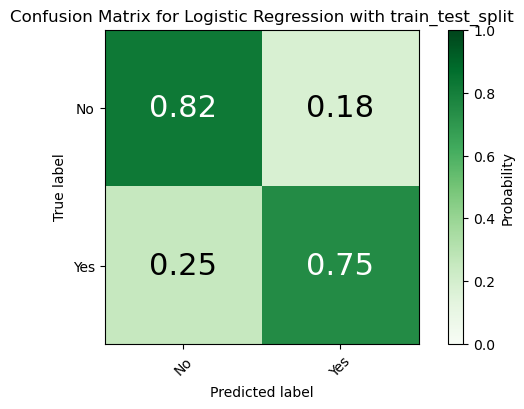



Метрики за Random Forest:
Точност: 0.8399522245446401
Прецизност: 0.8115183246073299
Възвръщаемост: 0.8680771624144369
F1 Score: 0.8388454600120264

Confusion Matrix:


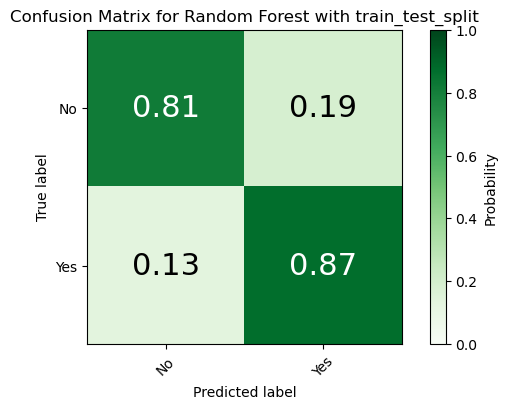



Метрики за Support Vector Machine:
Точност: 0.8112869513287548
Прецизност: 0.8048780487804879
Възвръщаемост: 0.8008711885500933
F1 Score: 0.802869619463506

Confusion Matrix:


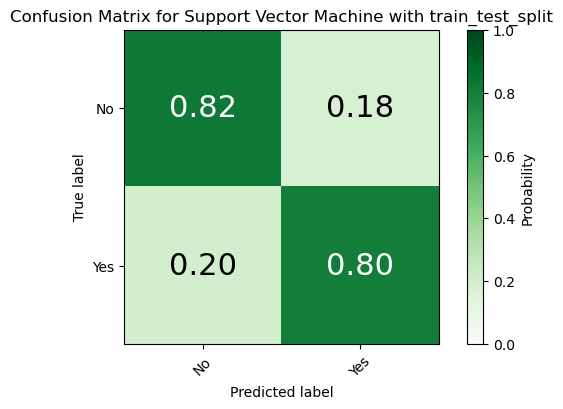

In [17]:
X_reduced = data_reduced.drop(target, axis=1)
y_reduced = data_reduced[target]
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train_reduced, y_train_reduced)
    y_pred_reduced = model.predict(X_test_reduced)
    display_metrics(name, y_test_reduced, y_pred_reduced, class_names)


Сега да направим сравнение на тренирани модели върху dataset съдържащ и несъдържащ 'default' feature-a:

Logistic Regression

| Metric | With 'default' |	Without 'default' |	Change
| :------: | :------: | :------: | :------: |
| Accuracy |	78.83% |	78.80% |	-0.03%
| Precision |	79.77% |	79.68% |	-0.09%
| Recall |	74.86% |	74.92% |	+0.06%
| F1 Score |	77.24% |	77.23% |	-0.01%


Random Forest

| Metric | With 'default' |	Without 'default' |	Change
| :------: | :------: | :------: | :------: |
| Accuracy |	83.99% |	83.52% |	-0.47%
| Precision |	81.30% |	80.90% |	-0.40%
| Recall |	86.56% |	85.94% |	-0.62%
| F1 Score |	83.85% |	83.34% |	-0.51%


Support Vector Machine (SVM)

| Metric | With 'default' |	Without 'default' |	Change
| :------: | :------: | :------: | :------: |
| Accuracy |	81.13% |	81.13% |	0.00%
| Precision |	80.53% |	80.49% |	-0.04%
| Recall |	80.02% |	80.09% |	+0.07%
| F1 Score |	80.27% |	80.29% |	+0.02%

### Въздействие върху Logistic Regression:

Премахването на "default" feature-a има незначително въздействие върху ефективността на модела на логистичната регресия. Промените в точността, прецизността, извикването и F1 score-a са незначителни, което предполага, че "default" не оказва съществено влияние върху прогнозите на този модел.

---

### Въздействие върху Random Forest:

След премахването на "default" ефективността на модела Random Forest леко намалява по всички показатели. Това предполага, че "default" е имал малък, но забележим принос към прогностичната способност на модела.

---

### Въздействие върху SVM:

Подобно на логистичната регресия, премахването на "default" до голяма степен не се отразява на работата на SVM модела. 

---

### Заключение:

Изглежда, че "default" има минимално въздействие върху моделите Logistic Regression и SVM, но малко по-забележимо въздействие върху работата на модела Random Forest. Това може да се дължи на различните начини, по които тези модели обработват важността на характеристиките и взаимодействията между тях.


2. Изключвайки характеристиката duration

Нека първо премахнем duration feature-а от датасета:

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data_without_duration = data.drop('duration', axis=1)

Сега повтаряме тренирането на моделите върху датасета без duration feature-a:

In [18]:
X_no_duration = data_without_duration.drop(target, axis=1)
y_no_duration = data[target]
X_train_no_duration, X_test_no_duration, y_train_no_duration, y_test_no_duration = train_test_split(X_no_duration, y_no_duration, test_size=0.3, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train_no_duration, y_train_no_duration)
    y_pred_no_duration = model.predict(X_test_no_duration)
    display_metrics(name, y_test_no_duration, y_pred_no_duration, class_names)

NameError: name 'data_without_duration' is not defined

Сега да направим сравнение на тренирани модели върху dataset съдържащ и несъдържащ 'duration' feature-a:

Logistic Regression

| Metric    | With 'duration' | Without 'duration' | Change  |
|:---------:|:---------------:|:------------------:|:-------:|
| Accuracy  | 78.83%          | 66.92%             | -11.91% |
| Precision | 79.77%          | 66.23%             | -13.54% |
| Recall    | 74.86%          | 63.35%             | -11.51% |
| F1 Score  | 77.24%          | 64.76%             | -12.48% |

Random Forest
| Metric    | With 'duration' | Without 'duration' | Change  |
|:----------|:---------------:|:------------------:|:-------:|
| Accuracy  | 83.99%          | 72.86%             | -11.13% |
| Precision | 81.30%          | 76.16%             | -5.14%  |
| Recall    | 86.56%          | 63.22%             | -23.34% |
| F1 Score  | 83.85%          | 69.09%             | -14.76% |

Support Vector Machine (SVM)
| Metric    | With 'duration' | Without 'duration' | Change  |
|:----------|:---------------:|:------------------:|:-------:|
| Accuracy  | 81.13%          | 69.87%             | -11.26% |
| Precision | 80.53%          | 72.48%             | -8.05%  |
| Recall    | 80.02%          | 59.99%             | -20.03% |
| F1 Score  | 80.27%          | 65.65%             | -14.62% |

### Въздействие върху логистичната регресия:
Премахването на характеристиката "duration" оказа значително въздействие върху работата на модела на логистична регресия, като се наблюдава значително намаляване на всички показатели.

---

### Въздействие върху Random Forest:
Моделът Random Forest също отбеляза значителен спад в производителността по всички показатели след премахването на характеристиката "продължителност". Забелязваме обаче, че въпреки липсата на тази влиятелна характеристика, прецизността на моделът не претърпява толкова голям спад. С други думи, той успява до известна степен да запази способността си да предположи правилно дали клиентът ще сключи договор. Наблюдава се обаче голям спад (-23%) в recall-а, което означава, че е по-склонен да предвиди, че клиент, който всъщност би сключил договор, няма да сключи.

---

### Въздействие върху SVM:
Моделът SVM показа значително намаляване на показателите за ефективност след изключването на характеристиката "продължителност", подобно на другите модели. Също така значително спада метриката recall, както при Random Forest

---

### Заключение:

Характеристиката "продължителност", която представлява продължителността на последния контакт в секунди, оказва значително влияние върху target-а. Например, продължителност на разговора от 0 секунди (което показва, че не е имало реален разговор) обикновено води до резултат "не" за целевата променлива (абонамент за срочен депозит). Критичният аспект на "продължителността" обаче е, че тя не е известна преди осъществяването на обаждането. Също така, след като разговорът приключи, резултатът от целевата променлива ("да" или "не") обикновено е известен. Ето защо, въпреки че "продължителността" е силно влияещ атрибут, той трябва да бъде включен само за целите на сравнението. При реалистичното прогнозно моделиране, при което целта е да се предвидят резултатите, преди те да са известни, "продължителността" следва да се изключи, тъй като тя предоставя информация, която не би била налична по време на изготвянето на прогнозите.

## Цялостно заключение:

Изключването на променливата "продължителност" от датасета и последващото намаляване на мерките за ефективност при предсказването на това дали клиент би се абонирал за срочен депозит може да подчертае ключовият принос на този атрибут към точността на модела. Изключването на този фактор може да доведе до загуба на информация и води до по-слаба способност на модела да предсказва клиентските решения (но и до по-реалистична, тъй като ни е нужно да знаем каква вероятност има клиентът да сключи договор преди да говорим с него). В резултат, при интерпретацията на резултатите е важно да се има предвид, че включването или изключването на конкретни характеристики може да оказва значително въздействие върху крайната ефективност на модела и неговата приложимост в реални сценарии.

### Идеи за подобрение:
1. Feature engineering: Важно е внимателно да се анализират и изберат най-подходящите за задачата характеристики. Чрез идентифициране и включване на по-информативни характеристики моделите потенциално могат да постигнат по-добра производителност.

2. Избор на модел: Струва си да се разгледат други алгоритми, които са специално разработени за дадената задача. Различните алгоритми могат да имат различни силни и слаби страни и експериментирането с алтернативни модели може да даде резултати, които са по-сполучливи от сегашните.

3. Настройване на хиперпараметри: Производителността на моделите може да бъде допълнително подобрена чрез фина настройка на техните хиперпараметри. Това включва систематично изследване на различни комбинации от хиперпараметри, за да се намери оптималната конфигурация за всеки алгоритъм. 
  За да се определи кои хиперпараметри са по-добри, може да се използват техники като
    - **Grid Search**: Този метод включва задаване на набор от възможни стойности за всеки хиперпараметър. След това изпробва всяка възможна комбинация от хиперпараметри и ще върне комбинацията, която дава най-добра производителност.

    - **Random search**: Вместо да се изпробват всички възможни комбинации, при случайното търсене се избират случайни комбинации от хиперпараметри, които да се изпробват. Това може да е по-бързо от grid search, особено ако броят на хиперпараметрите е голям.
